In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# VGG 16 모델 적용

- 이미지 데이터 전처리: ImageDataGenerator를 사용하여 이미지 데이터를 로드하고 전처리합니다. VGG16에 적합한 전처리 함수를 사용해야 합니다.

- VGG16 모델 로드: VGG16을 불러오고, 이를 기반으로 새로운 모델을 구성합니다.

- 새로운 톱 레이어 추가: 분류를 위한 새로운 레이어들을 추가합니다.

- 모델 컴파일: 모델을 컴파일합니다. 손실 함수와 옵티마이저를 선택합니다.

- 모델 훈련: 모델을 훈련 데이터로 훈련시키고, 검증 데이터로 검증합니다.

- 평가: 테스트 데이터를 사용하여 모델을 평가합니다.

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [3]:
TRAIN_DATA_DIR = '/content/drive/MyDrive/GDSC/data/train'
VALIDATION_DATA_DIR = '/content/drive/MyDrive/GDSC/data/val'
TEST_DATA_DIR = '/content/drive/MyDrive/GDSC/data/test'

TRAIN_SAMPLES = 800*2
VALIDATION_SAMPLES = 400*2
NUM_CLASSES = 7
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 64

In [4]:
# ImageDataGenerator 정의
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
# 훈련 및 검증 데이터 로더 설정
train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    VALIDATION_DATA_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 1392 images belonging to 7 classes.
Found 157 images belonging to 7 classes.


In [6]:
# VGG16 모델 로드 (톱 레이어 제외)
base_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
# 새로운 톱 레이어 정의
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [8]:
# 전체 모델 구성
model = Model(inputs=base_model.input, outputs=predictions)

In [9]:
# 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


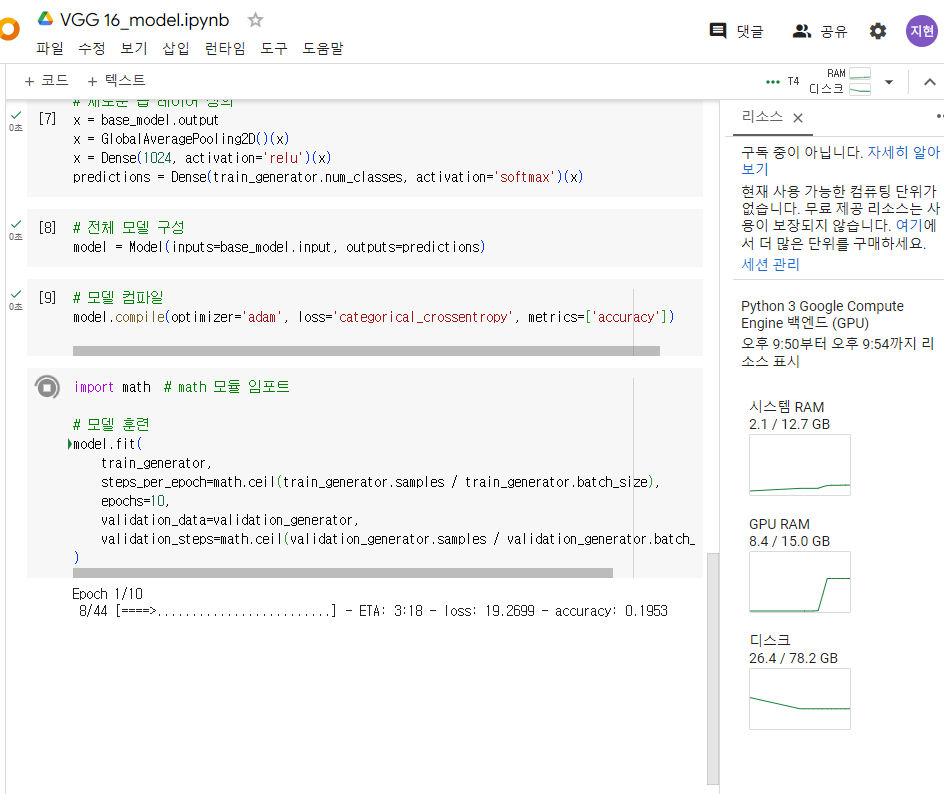

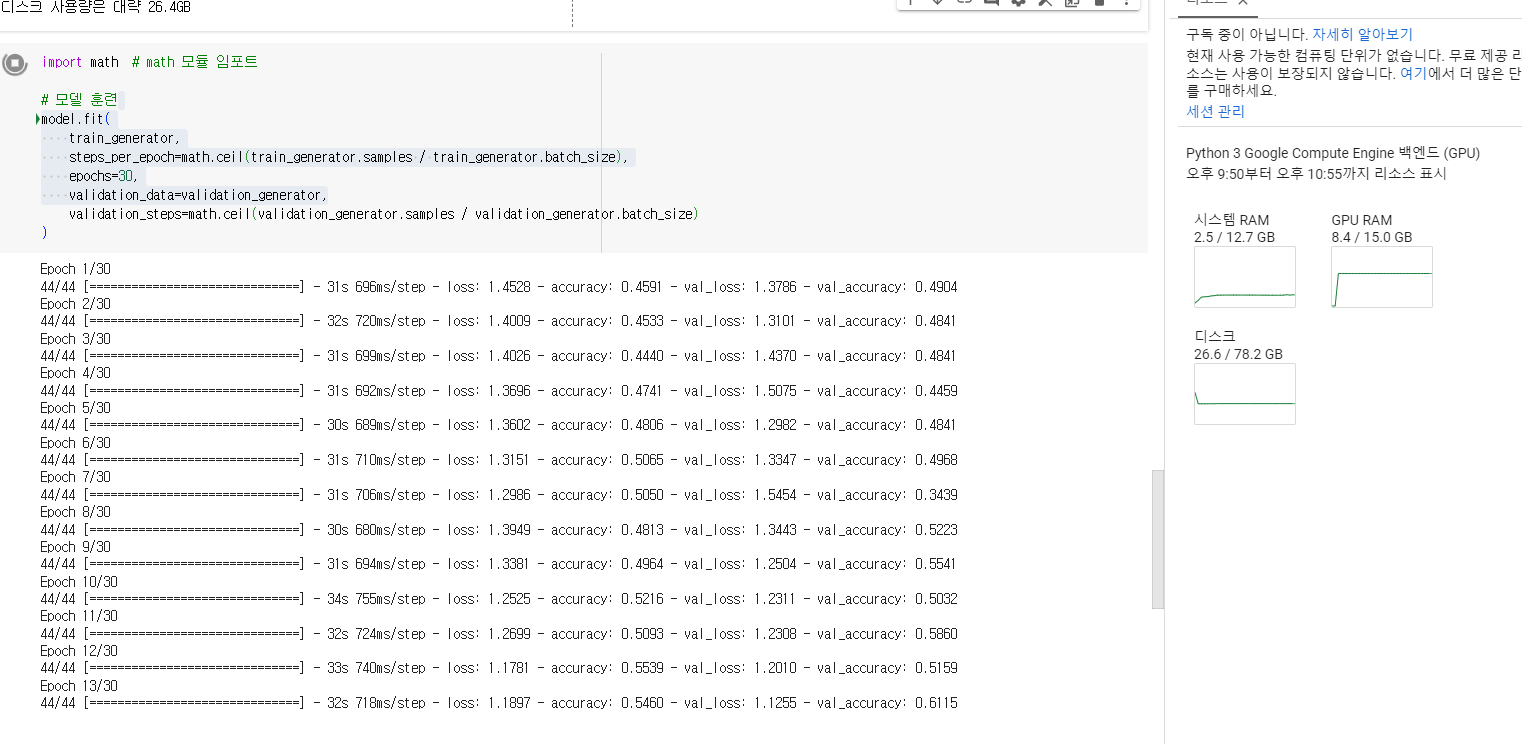

- EPOCH 10일 때

RAM은 대략 2.1GB
GPU는 대략 8.4GB
디스크 사용량은 대략 26.4GB

- EPOCH 30일 때

RAM은 대략 2.6GB
GPU는 대략 8.4GB
디스크 사용량은 대략 26.7GB

In [10]:
import math  # math 모듈 임포트

# 모델 훈련
model.fit(
    train_generator,
    steps_per_epoch=math.ceil(train_generator.samples / train_generator.batch_size),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size)
)

Epoch 1/30
44/44 [==============================] - 379s 8s/step - loss: 2.4508 - accuracy: 0.2191 - val_loss: 1.8397 - val_accuracy: 0.2484
Epoch 2/30
44/44 [==============================] - 29s 653ms/step - loss: 1.8569 - accuracy: 0.2694 - val_loss: 1.8446 - val_accuracy: 0.2484
Epoch 3/30
44/44 [==============================] - 29s 652ms/step - loss: 1.8842 - accuracy: 0.2428 - val_loss: 1.8917 - val_accuracy: 0.2484
Epoch 4/30
44/44 [==============================] - 30s 686ms/step - loss: 2.0383 - accuracy: 0.2392 - val_loss: 1.8135 - val_accuracy: 0.2930
Epoch 5/30
44/44 [==============================] - 30s 661ms/step - loss: 1.7925 - accuracy: 0.2902 - val_loss: 1.7424 - val_accuracy: 0.2930
Epoch 6/30
44/44 [==============================] - 29s 649ms/step - loss: 1.7219 - accuracy: 0.3398 - val_loss: 1.7148 - val_accuracy: 0.2803
Epoch 7/30
44/44 [==============================] - 29s 649ms/step - loss: 1.6654 - accuracy: 0.3534 - val_loss: 1.5020 - val_accuracy: 0.4204
E

# 학습 결과

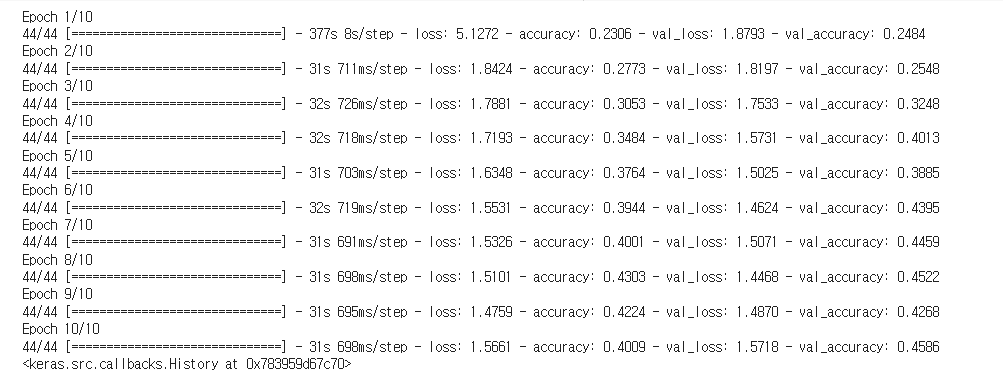

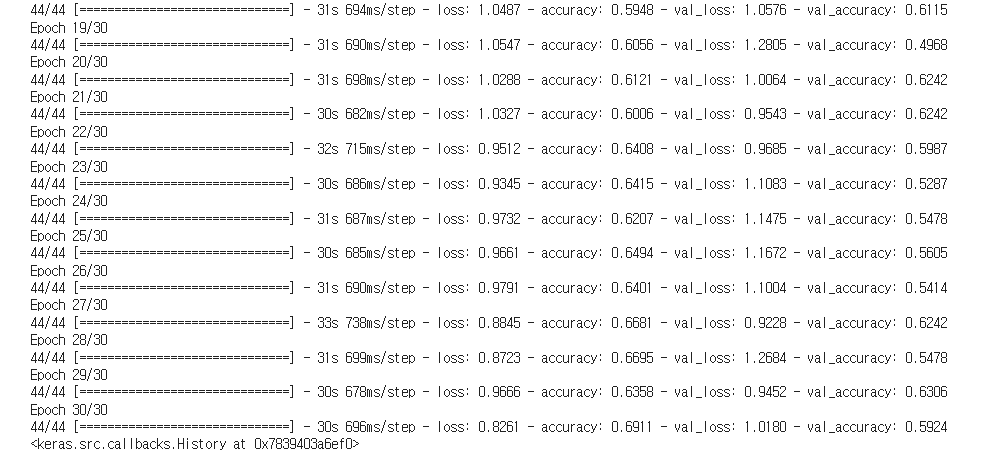

런타임 끊고 에포크 30으로 돌렸지만 결과가 좋지 못한 듯하다..

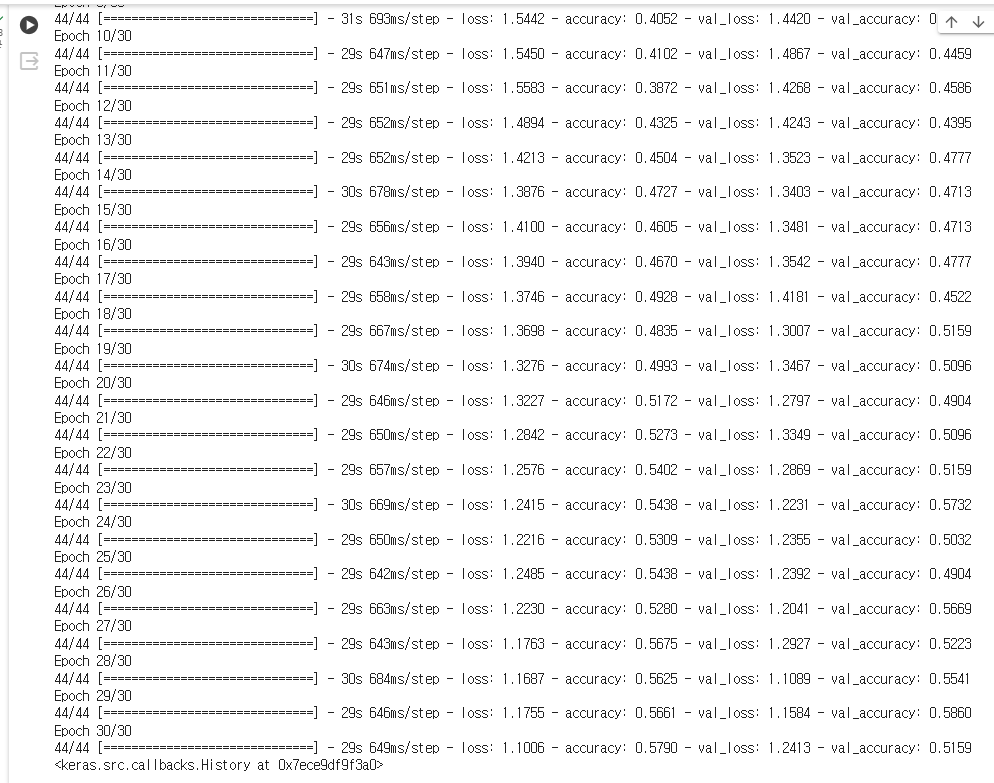

In [ ]:
model_save_path_10 = '/content/drive/MyDrive/GDSC/model/vgg16_gdsc_model.h5'

In [11]:
model_save_path_30 = '/content/drive/MyDrive/GDSC/model/vgg16_gdsc_model_30.h5'

In [12]:
# 모델 저장
model.save(model_save_path_30)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
